In [167]:
import pandas as pd
import geopandas as gp 
import json
from glob import glob
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from utils import ols
from sklearn import preprocessing

In [168]:
#Load all the variables
%store -r Area_values
%store -r predict_area_agg
%store -r gt_area_agg

In [169]:
pearsonr(predict_area_agg.values(),gt_area_agg.values())

(0.8608673339366695, 4.368619191262523e-97)

In [97]:
Area_values

{u'Adur': {'patients': 133765.0, 'population': 61929},
 u'Allerdale': {'patients': 108473.0, 'population': 96268},
 u'Amber Valley': {'patients': 386927.0, 'population': 122746},
 u'Arun': {'patients': 213991.0, 'population': 150877},
 u'Ashfield': {'patients': 252315.0, 'population': 120131},
 u'Ashford': {'patients': 243080.0, 'population': 120116},
 u'Aylesbury Vale': {'patients': 481973.0, 'population': 176867},
 u'Babergh': {'patients': 168634.0, 'population': 87917},
 u'Barking and Dagenham': {'patients': 277996.0, 'population': 190560},
 u'Barnet': {'patients': 723280.0, 'population': 363956},
 u'Barnsley': {'patients': 427077.0, 'population': 233671},
 u'Barrow-in-Furness': {'patients': 92644.0, 'population': 68446},
 u'Basildon': {'patients': 291740.0, 'population': 176474},
 u'Basingstoke and Deane': {'patients': 333885.0, 'population': 170492},
 u'Bassetlaw': {'patients': 234610.0, 'population': 112248},
 u'Bath and North East Somerset': {'patients': 264739.0, 'population': 

In [98]:
# sns.distplot(predict_area_agg.values())

In [99]:
# # Create the Scaler object
# scaler = preprocessing.StandardScaler()
# # standardize_predict = scaler.fit_transform(predict_area_agg.values())
# normalized_X = preprocessing.normalize(predict_area_agg.values())
# sns.distplot(normalized_X)

In [100]:
featArray = np.zeros((len(Area_values),4))

for i in range(len(Area_values)):
    key = Area_values.keys()[i]
    featArray[i,0] = gt_area_agg[key]
    featArray[i,1] = predict_area_agg[key]
    featArray[i,2] = np.log10(Area_values[key]['population'])
    featArray[i,3] = float(Area_values[key]['patients'])/float(Area_values[key]['population'])

In [104]:
normed_feats = featArray.copy()
normed_feats = preprocessing.normalize(featArray)

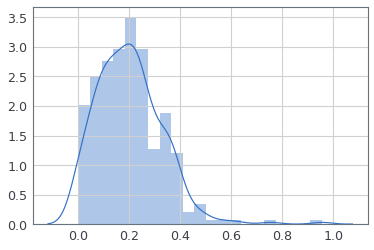

In [109]:
sns.distplot(normed_feats[:,3])

In [110]:
pearsonr(normed_feats[:,0],normed_feats[:,1])

(0.8883833104934239, 1.4325247255112718e-111)

In [111]:
y = normed_feats[:,0]
x = normed_feats[:,1:]
mymodel = ols.ols(y,x,'GT',['Pred','logPop','patient_rate'])

In [112]:
mymodel.summary()


Dependent Variable: GT
Method: Least Squares
Date:  Thu, 18 Jul 2019
Time:  11:42:16
# obs:                 326
# variables:         4
variable     coefficient     std. Error      t-statistic     prob.
const          -0.015821      0.002034     -7.776436      0.000000
Pred           -0.189756      0.126518     -1.499830      0.134638
logPop           0.015507      0.001962      7.901949      0.000000
patient_rate           0.029430      0.004391      6.702309      0.000000
Models stats                         Residual stats
R-squared             0.839512         Durbin-Watson stat   1.989747
Adjusted R-squared    0.838017         Omnibus stat         15.805225
F-statistic           561.462224         Prob(Omnibus stat)   0.000370
Prob (F-statistic)    0.000000			JB stat              37.690637
Log likelihood        1779.582865			Prob(JB)             0.000000
AIC criterion        -10.893146         Skew                -0.126875
BIC criterion        -10.846681         Kurtosis           

In [113]:
mymodel.p

array([1.01696429e-13, 1.34638268e-01, 4.39648318e-14, 9.18816134e-11])

In [151]:
%store -r predict_area_agg_GP
%store -r gt_area_agg_GP

In [152]:
len(predict_area_agg_GP)

121

In [153]:
pearsonr(predict_area_agg_GP.values(),gt_area_agg_GP.values())

(0.27014908153195627, 0.0027290092623489574)

In [154]:
common_keys = list(set(Area_values.keys()).intersection(gt_area_agg_GP.keys()))

In [155]:
featArray_GP = np.zeros((len(common_keys),4))

for i in range(len(common_keys)):
    key = common_keys[i]
    featArray_GP[i,0] = gt_area_agg_GP[key]
    featArray_GP[i,1] = predict_area_agg_GP[key]
    featArray_GP[i,2] = np.log10(Area_values[key]['population'])
    featArray_GP[i,3] = float(Area_values[key]['patients'])/float(Area_values[key]['population'])

In [156]:
featArray_GP.shape

(121, 4)

In [157]:
pearsonr(featArray_GP[:,0],featArray_GP[:,1])

(0.27014908153195627, 0.0027290092623489574)

In [158]:
normed_feats_GP = featArray_GP.copy()
normed_feats_GP = preprocessing.normalize(featArray_GP)

In [159]:
pearsonr(featArray_GP[:,0],featArray_GP[:,1])

(0.27014908153195627, 0.0027290092623489574)

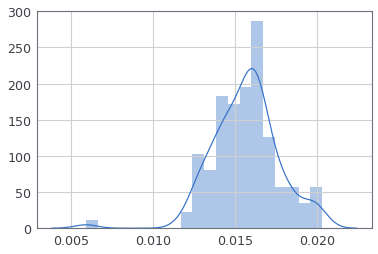

In [160]:
sns.distplot(normed_feats_GP[:,0],bins=20)

In [161]:
np.mean(featArray_GP[:,0]) , np.std(featArray_GP[:,0])

(0.08666115702479339, 0.010167647378167095)

In [162]:
y = normed_feats_GP[:,0]
x = normed_feats_GP[:,1:]
mymodel = ols.ols(y,x,'GT',['Pred','logPop','patient_rate'])

In [166]:
mymodel.summary()


Dependent Variable: GT
Method: Least Squares
Date:  Thu, 18 Jul 2019
Time:  15:30:21
# obs:                 121
# variables:         4
variable     coefficient     std. Error      t-statistic     prob.
const           0.001120      0.004483      0.249742      0.803225
Pred            0.145300      0.049267      2.949242      0.003848
logPop           0.010407      0.004533      2.295603      0.023480
patient_rate          -0.000071      0.002396     -0.029480      0.976532
Models stats                         Residual stats
R-squared             0.254015         Durbin-Watson stat   2.137374
Adjusted R-squared    0.234887         Omnibus stat         2.594851
F-statistic           13.279861         Prob(Omnibus stat)   0.273234
Prob (F-statistic)    0.000000			JB stat              2.614274
Log likelihood        595.541432			Prob(JB)             0.270594
AIC criterion        -9.777544         Skew                 0.342250
BIC criterion        -9.685122         Kurtosis             2.77

In [87]:
mymodel.p

array([6.05240596e-01, 4.78559715e-03, 1.52017839e-06, 8.53325967e-02])

In [164]:

pearsonr(featArray_GP[:,0],featArray_GP[:,1])

(0.27014908153195627, 0.0027290092623489574)

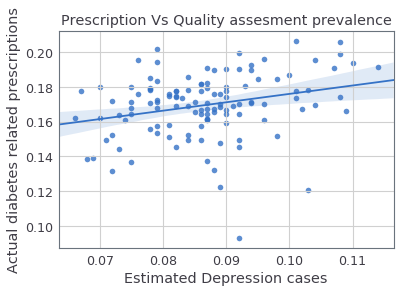

In [165]:
sns.regplot(x=featArray_GP[:,0] , y = featArray_GP[:,1])
ax = plt.gca()
ax.set_title("Prescription Vs Quality assesment prevalence")
ax.set_xlabel("Estimated Depression cases")
ax.set_ylabel("Actual diabetes related prescriptions")

In [44]:
featArray_GP

array([[0.00927199, 0.03433237, 5.04042431, 1.34913216],
       [0.01438116, 0.02884918, 4.95590412, 1.09448226],
       [0.00675676, 0.03521728, 5.16382305, 0.23514285],
       ...,
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [ ]:
pdp = pd.read_csv('../BL_Work/openPrescribe/',compression='gzip')